<a href="https://colab.research.google.com/github/hosseindamavandi/Fake-News-Detection/blob/main/Note-Books/ANN/ANN_Using_L1_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd drive/MyDrive/Neuromatch

/content/drive/MyDrive/Neuromatch


In [3]:
"""
data manipulatig
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

"""
natural language processing
"""
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
true_data = pd.read_csv('datasets/True.csv')
fake_data = pd.read_csv('datasets/Fake.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
# Adding labels
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [9]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
8794,"For Chinese officials, Trump perhaps better th...","BEIJING (Reuters) - In 2010, then Secretary of...",politicsNews,"July 11, 2016",1
19644,UK foreign minister Johnson says he will not r...,LONDON (Reuters) - Britain s foreign minister ...,worldnews,"September 19, 2017",1
7942,Someone Just Turned The Lights Off On Donald ...,It looks as though someone just finally had en...,News,"February 21, 2016",0
17211,TOP DEMOCRAT ACTIVIST WHO LAUNCHED ONLINE CAMP...,"CJ Pearson, the 12 year old conservative socia...",Government News,"Jul 9, 2015",0
7328,Trump win opens way for China to take climate ...,WASHINGTON/BEIJING (Reuters) - The election of...,politicsNews,"November 11, 2016",1
10400,Greg Gutfeld Scores a Priceless TV Moment…Wear...,Greg Gutfeld scored a priceless TV moment duri...,politics,"Jul 15, 2017",0
20610,Russia hopes to agree on debt repayment with V...,MOSCOW (Reuters) - The Russian finance ministr...,worldnews,"September 8, 2017",1
7620,Leave It To Ellen DeGeneres To PERFECTLY Mock...,When thinking about who you d likely want as t...,News,"March 8, 2016",0
7862,Obama to consider 'proportional' response to R...,ABOARD AIR FORCE ONE (Reuters) - U.S. Presiden...,politicsNews,"October 11, 2016",1
5429,Trump’s VP Pick Attacked Animated Disney Movi...,"Mike Pence, the presumptive Republican nominee...",News,"July 18, 2016",0


In [10]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [11]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
8794,"For Chinese officials, Trump perhaps better th...","BEIJING (Reuters) - In 2010, then Secretary of...","July 11, 2016",1,0,0,0,0,0,0,1,0
19644,UK foreign minister Johnson says he will not r...,LONDON (Reuters) - Britain s foreign minister ...,"September 19, 2017",1,0,0,0,0,0,0,0,1
7942,Someone Just Turned The Lights Off On Donald ...,It looks as though someone just finally had en...,"February 21, 2016",0,0,0,1,0,0,0,0,0
17211,TOP DEMOCRAT ACTIVIST WHO LAUNCHED ONLINE CAMP...,"CJ Pearson, the 12 year old conservative socia...","Jul 9, 2015",0,1,0,0,0,0,0,0,0
7328,Trump win opens way for China to take climate ...,WASHINGTON/BEIJING (Reuters) - The election of...,"November 11, 2016",1,0,0,0,0,0,0,1,0


In [12]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 8794 to 15358
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 1.7+ MB


In [ ]:
nltk.download('all')

In [14]:
from nltk.stem.porter import *
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()

for txt in data.text:
    txt = re.sub(pattern, " ", txt)  # Cleaning
    txt = txt.lower()  # Lowering
    txt = nltk.word_tokenize(txt)  # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt]  # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)
    new_text.append(txt)

new_text[0]

'beij reuter in then secretari of state hillari clinton provok outrag in beij when she push the south china sea to the top of the region and u s secur agenda now a an intern court prepar to hand down a rule that threaten china s sweep claim in the vital waterway beij is watch clinton s presidenti run with trepid combin with her tough line on human right and role in lead presid barack obama s asia rebalanc clinton is well known in china but not well like while presidenti rival donald trump ha irrit beij with comment such a compar the u s trade deficit with china to rape he is larg an unknown quantiti a person who even privat offici shrug their shoulder over clinton will be a difficult partner one senior chines diplomat sourc told reuter have just admit to not know much about trump or what he stand for chines diplomat take some comfort that clinton s view are known to them from year of high level contact from her day a first ladi to her senat tenur to her time a secretari of state but th

In [15]:
from nltk.stem.porter import *
new_title = []
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()

for txt in data.title:
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)

    stemmer = PorterStemmer()
    txt = stemmer.stem(txt)

    new_title.append(txt)
new_title[0]

'for chines offici trump perhap better the devil they don t know'

In [16]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


In [17]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 8794 to 15358
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 1.0 MB


In [18]:
data.head()

,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
8794,1,0,0,0,0,0,0,1,0
19644,1,0,0,0,0,0,0,0,1
7942,0,0,0,1,0,0,0,0,0
17211,0,1,0,0,0,0,0,0,0
7328,1,0,0,0,0,0,0,1,0


In [19]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [20]:
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

In [21]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [22]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


In [23]:
"""
pytorch
"""

import torch
import torch.nn as nn
"""
visualization tools
"""

import matplotlib.pyplot as plt
import seaborn as sns

"""
train test split
"""
from sklearn.model_selection import train_test_split

In [24]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01 * (0.1 ** (epoch // 10)))
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)


error = nn.CrossEntropyLoss()

In [25]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

lambda_l1 = 0.001  # L1 regularization strength
lambda_l2 = 0.001  # L2 regularization strength

EPOCHS = 20

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    outs = model(X_train)
    loss = error(outs, Y_train)

    # L1 regularization
    l1_regularization = torch.tensor(0.)  # Initialize L1 regularization term
    l2_regularization = torch.tensor(0.)  # Initialize L2 regularization term

    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)
        l2_regularization += torch.norm(param, p=2)

    loss += lambda_l1 * l1_regularization + lambda_l2 * l2_regularization

    loss.backward()
    optimizer.step()

    print(f"Loss after iteration {epoch} is {loss}")


Loss after iteration 0 is 83.46742248535156
Loss after iteration 1 is 48.45685958862305
Loss after iteration 2 is 60.38137435913086
Loss after iteration 3 is 54.582576751708984
Loss after iteration 4 is 52.379329681396484
Loss after iteration 5 is 45.899314880371094
Loss after iteration 6 is 31.636043548583984
Loss after iteration 7 is 30.189481735229492
Loss after iteration 8 is 35.218360900878906
Loss after iteration 9 is 39.73981857299805
Loss after iteration 10 is 38.81623840332031
Loss after iteration 11 is 31.92630958557129
Loss after iteration 12 is 20.750614166259766
Loss after iteration 13 is 23.03487777709961
Loss after iteration 14 is 27.376375198364258
Loss after iteration 15 is 27.797256469726562
Loss after iteration 16 is 28.26207160949707
Loss after iteration 17 is 23.643489837646484
Loss after iteration 18 is 18.114315032958984
Loss after iteration 19 is 20.270164489746094


In [26]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

tensor([ 0.0816, -0.0012], grad_fn=<SelectBackward0>)
tensor(0)
Model accuracy is  0.5255233853006681


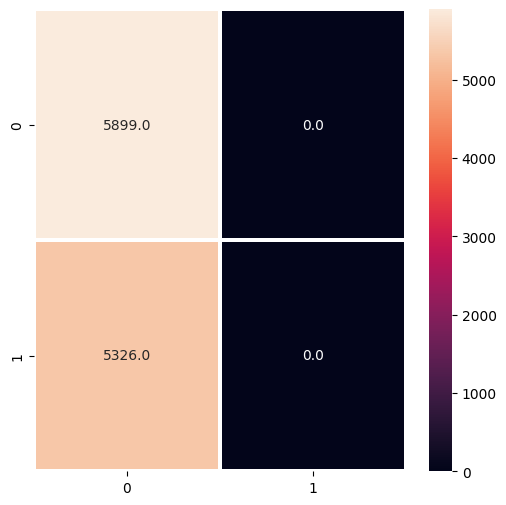

In [27]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()